<a href="https://colab.research.google.com/github/anhkiet2308/Project-AI/blob/Object-recognition-for-smart-cities---Project-final/train_smart_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
# Tập dữ liệu gồm các mẫu dữ liệu đầu vào X và nhãn y
X = np.load('/content/drive/MyDrive/data_train_smart_city_photos.npy')
y = np.load('/content/drive/MyDrive/data_train_smart_city_labels.npy')
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 80/20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
resulf = {0.0:'none',1.0:'xe đạp',2.0:'xe máy',3.0:'xe ô tô',4.0:'xe tải',5.0:'xe khách'
          ,6.0:'xe ưu tiên',7.0:'tàu điện',8.0:'xe buýt',9.0:'tàu thủy',10.0:'máy bay thương mại'
          ,11.0:'máy bay quân sự',12.0:'máy bay trực thăng',13.0:'con người',14.0:'con chó',15.0:'con mèo'
          ,16.0:'nhà ở',17.0:'vạch kẻ đường cho người đi bộ',18.0:'đèn giao thông',19.0:'đèn đường',20.0:'thùng rác công cộng'
          ,21.0:'biển báo giao thông'}

In [5]:
x_train = x_train.astype('float32')/255

x_test = x_test.astype('float32')/255

In [6]:
from keras.utils import to_categorical #one hot enccoding

In [7]:
y_train = to_categorical (y_train,700)
y_test = to_categorical(y_test,700)

In [8]:
from keras.models import Sequential,Model #CNN
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,normalization,LeakyReLU 
from keras.optimizers import Adam
model = Sequential()
#
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2),padding='same'))
#
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2),padding='same'))
#
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2),padding='same'))
#
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(700,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [9]:
from keras.losses import categorical_crossentropy
model.compile(optimizer=Adam(),loss=categorical_crossentropy,metrics=['accuracy'])
train=model.fit(x_train,y_train,epochs =30,batch_size=64,verbose=1)

Epoch 1/30
10/10 [==============================] - 10s 88ms/step - loss: 5.3964 - accuracy: 0.0326
Epoch 2/30
10/10 [==============================] - 1s 56ms/step - loss: 3.7078 - accuracy: 0.0481
Epoch 3/30
10/10 [==============================] - 1s 53ms/step - loss: 3.0493 - accuracy: 0.1615
Epoch 4/30
10/10 [==============================] - 1s 54ms/step - loss: 2.4634 - accuracy: 0.3007
Epoch 5/30
10/10 [==============================] - 1s 53ms/step - loss: 2.3564 - accuracy: 0.3419
Epoch 6/30
10/10 [==============================] - 1s 53ms/step - loss: 1.9325 - accuracy: 0.4124
Epoch 7/30
10/10 [==============================] - 1s 52ms/step - loss: 1.5456 - accuracy: 0.5137
Epoch 8/30
10/10 [==============================] - 1s 52ms/step - loss: 1.3171 - accuracy: 0.5842
Epoch 9/30
10/10 [==============================] - 1s 52ms/step - loss: 1.0893 - accuracy: 0.6392
Epoch 10/30
10/10 [==============================] - 1s 52ms/step - loss: 0.8465 - accuracy: 0.7509
Epoch 11

In [10]:
model.save('drive/MyDrive/model_smart_city.h5')

Test loss: 2.105320692062378
Test accuracy 0.48630136251449585


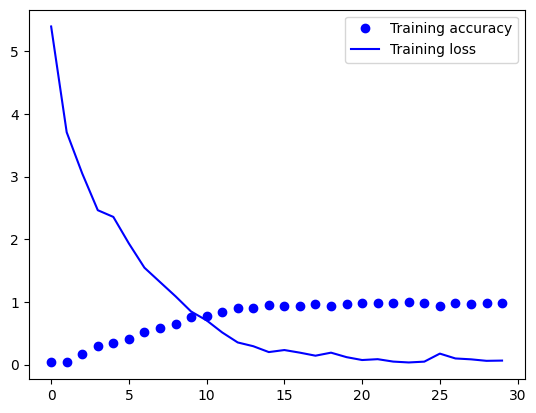

In [11]:
import matplotlib.pyplot as plt
test = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',test[0])
print('Test accuracy',test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.legend()
plt.show()

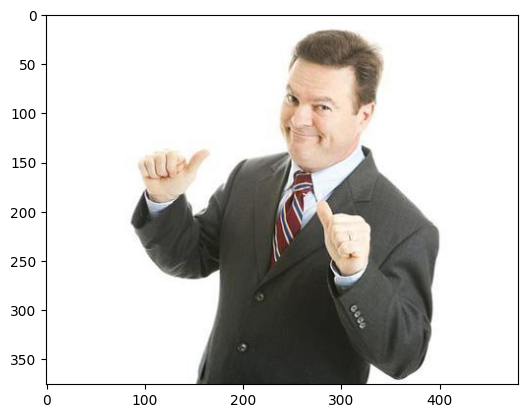

In [12]:
from keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/nguoi.jpg')
plt.imshow(img)
plt.show()

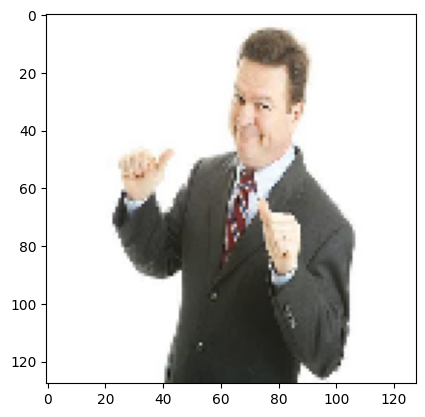

In [ ]:
img=load_img('/content/drive/MyDrive/nguoi.jpg',target_size=(128,128))
plt.imshow(img)

In [ ]:
import numpy as np
img=img_to_array(img)
img=img.reshape(1,128,128,3)
img=img.astype('float32')
img=img/255
index=np.argmax(model.predict(img))
print('Đây là: ',resulf[index])

1/1 [==============================] - 0s 19ms/step
Đây là:  con người


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
